# I. SVM --> "Machines à Vecteurs de Support" ou en Anglais "Support Vector Machine". 

## I. Histoire :

Conceptualisé par Vladimir Vapnik dès le début des années 60, il fait son entrée dans le milieu de l’informatique en 1990.<br>  Dès lors, il devient une référence pour tous ceux qui s’intéressent de près ou de loin aux techniques d’apprentissage supervisé. <br> Encore aujourd’hui, il continue d’être enseigné, étudié et massivement utilisé.<br>  Vous l’aurez compris, nous allons parler ici des Machines à Vecteurs de Support, aussi appelé SVM pour Support Vector Machine. 
* Permet de faire prédiction quantitative ou qualitative 

> `Warning : Parler de la simplicité d’un tel algorithme revient à parler de la petitesse de la Lune. ` <br>
> ` On sait qu’elle est petite à côté de ce qui l’entoure, mais on pourrait quand même pas en faire le tour à pied.`

nous allons vous présenter le principe de base des Margin Classifiers, et les limites de ces derniers.

## II. Mathématiques

### 1°) Margin Classifiers

La méthode que l’on va appliquer est la suivante :

Tracer une droite séparant les 2 classes.<br> Si l’observation se trouve au-dessus de cette droite, on dira qu’il s’agit d’un “+”, sinon d’un “-”. <br>
* Comment on trace la droite : trace la droite qui maximise l'écart entre les différents groupes.
* Exemple : on prend le point d'un groupe A le plus proche d'un point le plus proche du groupe B, et le point B le plus proche du point du groupe A. <br> et on trace une droite qui maximise la distance entre les deux points pour que la droite soit au millieu des deux points et que ainsi la capacité de généralisation de l'algo soit optimal.
* Soucis lorsque le jeu de donnée n'est pas linéairement séparable : on utilise pour cela l'astuce du noyau.<br> On applique une transofrmation sur nos données pour les rendre linéairement séparable. 
* AUtres soucis : lorsque l'on a plus de trois types de classes. Solutions :

<img src="./droiteclassification.png" alt="drawing"/>

> `En mathématiques, la distance qui sépare une droite de l’observation la plus proche est appelée la marge. ` <br>

> `La droite centrale a une marge plus importante que les deux autres. `

La méthode semble fonctionner correctement.<br>
Cependant, dans le cas particulier de notre problème, il existe une infinité de droites séparant parfaitement les 2 ensembles.<br>
Chacune d’elle délimite des espaces différents et constitue une réponse différente au problème. <br>
La question est alors de savoir comment choisir la meilleure droite parmi toutes les droites possibles.

<img src="./plusieurspossibilite.png" alt="drawing"/>

> `En mathématiques, la distance qui sépare une droite de l’observation la plus proche est appelée la marge.`<br>` La droite centrale a une marge plus importante que les deux autres.`<br>` Autrement dit, la droite qui sépare le mieux les 2 classes est celle dont la marge est la plus élevée. `<br>`Vous comprenez désormais d’où vient le terme de “Maximal Margin Classifiers” ?`

<img src="marge.png" alt="drawing"/>

Le système de marge fonctionne uniquement quand c'est linéaire, exemple quand il s'agit de température à l'année

- - -

### 2°) les fonctions "noyau"

Pour palier ce problème on utilise la technique du noyau, et on applique une transforme pour les linéairement séparable 
Voici quelques formules pour les noyaux

### Noyau linéaire


<img src="https://latex.codecogs.com/png.image?\dpi{110}&space;\bg_white&space;\inline&space;K\left&space;(&space;x,x'&space;\right&space;)&space;=&space;\left<&space;x,x'\right>" title="\bg_white \inline K\left ( x,x' \right ) = \left< x,x'\right>" width=300 />

### Noyau quadratuque homogène 

<img src="https://latex.codecogs.com/png.image?\dpi{110}&space;\bg_white&space;\inline&space;K\left&space;(&space;x,x'&space;\right&space;)&space;=&space;\left<&space;x,x'\right>^{2}" title="\bg_white \inline K\left ( x,x' \right ) = \left< x,x'\right>^{2}"  width=300/>

### Noyau plynomial

<img src="https://latex.codecogs.com/png.image?\dpi{110}&space;\bg_white&space;\inline&space;K\left&space;(&space;x,x'&space;\right&space;)&space;=&space;\left&space;(\left<&space;x,x'\right>&plus;&space;c^{d}&space;&space;\right&space;)" title="\bg_white \inline K\left ( x,x' \right ) = \left (\left< x,x'\right>+ c^{d} \right )"  width=300/>

### Noyau gaussien

<img src="noyaugaussien.png" alt="drawing"/>

### Noyau RBF (Radial Basis Funtion)

<img src="noyau RBF.png" alt="drawing"/>

## III. Python

> Importation des bibliothèques `SVM` :

In [7]:
# charger les données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('winequality-white.csv', sep=';')

# créer la matrice de données
X = data[data.columns[:-1]].values

# créer le vecteur d'étiquettes
y = data['quality'].values

# créer un jeu d'entrainement et un jeu de test (30% des données)
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3)
                                
# standardiser les données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)                               

> Construction de l'algorithme : <br> Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :

In [8]:
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))


RMSE: 0.73


> On obtient une RMSE de 0.73, ce qui est correct pour des nombres entiers allant de 3 à 9.<br>

> Pour visualiser les prédictions, on peut utiliser un nuage de points dans lequel la surface de chaque point est proportionnelle au nombre d'observations ayant exactement ces valeurs de score prédit et de score réel.<br>
> Pour plus de détails, vous pouvez vous référer à la procédure utilisée dans le cours Comparez votre algorithme à des approches de régression naïves.

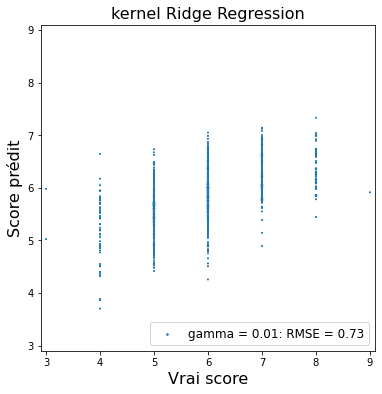

In [9]:
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_test_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en utilisant des paramètres par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :Entrain+= 1
    else:
        sizes[(yt, yp)] = 1        
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([2.9, 9.1])
plt.ylim([2.9, 9.1])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)

> Pour optimiser le paramètre de régularisation alpha et le paramètre gamma du noyau gaussien, on peut utiliser une recherche sur grille :

In [11]:
# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train_std, y_train)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(X_test_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv))


Pour optimiser le paramètre de régularisation alpha et le paramètre gamma du noyau gaussien, on peut utiliser une recherche sur grille :